# Support Vector Regression (SVR)

Support Vector Regression (SVR) es una extensión del modelo Support Vector Machine (SVM), que se utiliza principalmente para problemas de regresión. Al igual que SVM, SVR intenta encontrar un hiperplano óptimo que separe los datos, pero en lugar de clasificación, busca predecir un valor continuo. La idea principal es encontrar una función que tenga un máximo desvío permitido $\epsilon$ del valor real para todos los puntos de entrenamiento, al mismo tiempo que es tan plana como sea posible.

## Procesamiento Previo de los Datos

Para que SVR funcione de manera eficiente, a menudo es necesario realizar algunos pasos de preprocesamiento:

- **Estandarización**: Es importante estandarizar o normalizar los datos, ya que SVR se basa en la distancia entre puntos de datos y la elección de los parámetros del kernel (como el kernel de RBF) es sensible a la escala de los datos.
- **Manejo de valores nulos**: SVR no puede manejar valores nulos directamente, por lo que cualquier dato faltante debe ser imputado o eliminado.
- **Codificación de variables categóricas**: Si existen variables categóricas, deben ser convertidas a formato numérico, generalmente usando codificación one-hot.

## Estructura y Ecuación Matemática del Modelo

El objetivo del SVR es encontrar una función $f(x)$ que prediga el valor de salida $y$ de la siguiente manera:

$$ f(x) = \langle w, x \rangle + b $$

Donde:
- $\langle w, x \rangle$ es el producto punto entre el vector de pesos $w$ y el vector de características $x$.
- $b$ es el término de sesgo o bias.

En SVR, se minimiza la función de costo bajo la restricción de que los errores de predicción se encuentren dentro de un margen de tolerancia $\epsilon$:

$$
\text{Minimizar: } \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

Sujeto a las restricciones:
$$
\begin{aligned}
y_i - \langle w, x_i \rangle - b &\leq \epsilon + \xi_i \\
\langle w, x_i \rangle + b - y_i &\leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{aligned}
$$

Donde:
- $\xi_i$ y $\xi_i^*$ son variables de holgura que permiten penalizar las predicciones que se encuentran fuera del margen $\epsilon$.
- $C$ es un parámetro de regularización que controla la compensación entre el margen de tolerancia y el error permitido en el entrenamiento.

## Métodos de Estimación de Parámetros o Entrenamiento

El entrenamiento del modelo SVR consiste en resolver un problema de optimización cuadrática (QP) con restricciones. Este problema de optimización es generalmente resuelto mediante técnicas de programación cuadrática o métodos como el algoritmo de gradiente.

Los pasos principales incluyen:

1. **Seleccionar un kernel**: SVR puede utilizar diferentes tipos de kernels (lineal, polinómico, RBF, etc.) para transformar los datos a un espacio de mayor dimensión donde sea más fácil encontrar un hiperplano que divida los datos.
2. **Optimización de la función objetivo**: Encontrar los valores de $w$ y $b$ que minimicen la función de costo sujeta a las restricciones mencionadas.

## Limitaciones, Ventajas y Desventajas

**Ventajas:**
- Funciona bien con conjuntos de datos pequeños y medianos.
- Es efectivo en espacios de alta dimensionalidad y cuando el número de dimensiones es mayor que el número de muestras.
- Flexible con la elección de diferentes funciones de kernel.

**Desventajas:**
- No es escalable para grandes conjuntos de datos, ya que el tiempo de entrenamiento aumenta significativamente con el número de muestras.
- La selección de los hiperparámetros (como $C$ y $\epsilon$) y el kernel adecuado puede ser compleja y requiere validación cruzada.
- Sensible a la escala de los datos, por lo que la estandarización es crítica.

Mean Squared Error: 0.007160692475406625


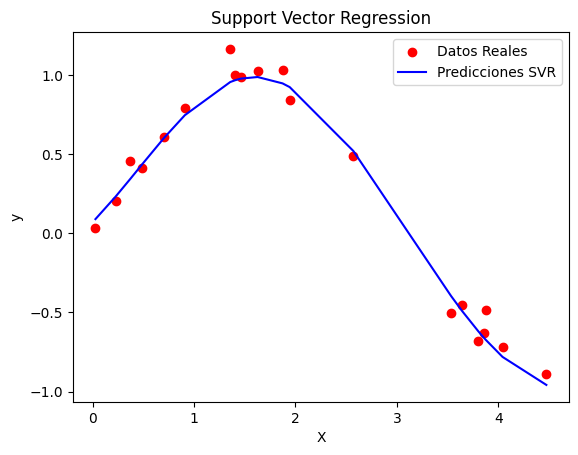

In [7]:
# Ejemplo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generación de datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Definir el modelo SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Entrenamiento del modelo
svr.fit(X_train_scaled, y_train_scaled)

# Predicciones
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Ordenar los datos para una mejor visualización
sorted_indices = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualización de los resultados
plt.scatter(X_test, y_test, color='red', label='Datos Reales')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', label='Predicciones SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()




In [3]:
print(X_test)
print(y_pred)

[[4.04198674]
 [2.57117219]
 [3.53428672]
 [1.94338645]
 [1.87270059]
 [1.62665165]
 [0.90912484]
 [3.87566412]
 [0.37275322]
 [0.02761059]
 [0.70462112]
 [1.35674516]
 [3.64503584]
 [1.46072324]
 [4.47413675]
 [0.22613644]
 [3.80392524]
 [3.8548359 ]
 [0.48836057]
 [1.40467255]]
[-0.78079374  0.52055189 -0.39564151  0.92442601  0.94796362  0.98826853
  0.74694056 -0.67224445  0.34541516  0.09013901  0.60381613  0.95650902
 -0.4920538   0.97803822 -0.95787826  0.23224532 -0.61956775 -0.65729168
  0.4366108   0.96784822]
